## Linear Regression model for Bike Sharing

The steps followed are -
1. Reading, understanding and visualising the data
2. Preparing the data for modeling (train-test split, rescaling)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
import warnings
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Read and visualise the data
***

In [2]:
#Read the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


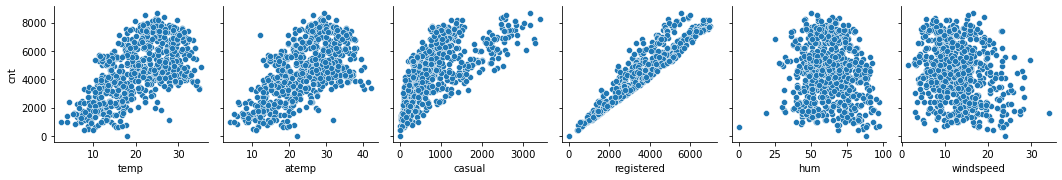

In [6]:
# visualise the data
sns.pairplot(data=df, x_vars=['temp', 'atemp', 'casual', 'registered', 'hum', 'windspeed'], y_vars='cnt')

### Observations
* temp variable (Temperature) has highest co-relation with target variable ‘cnt’.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

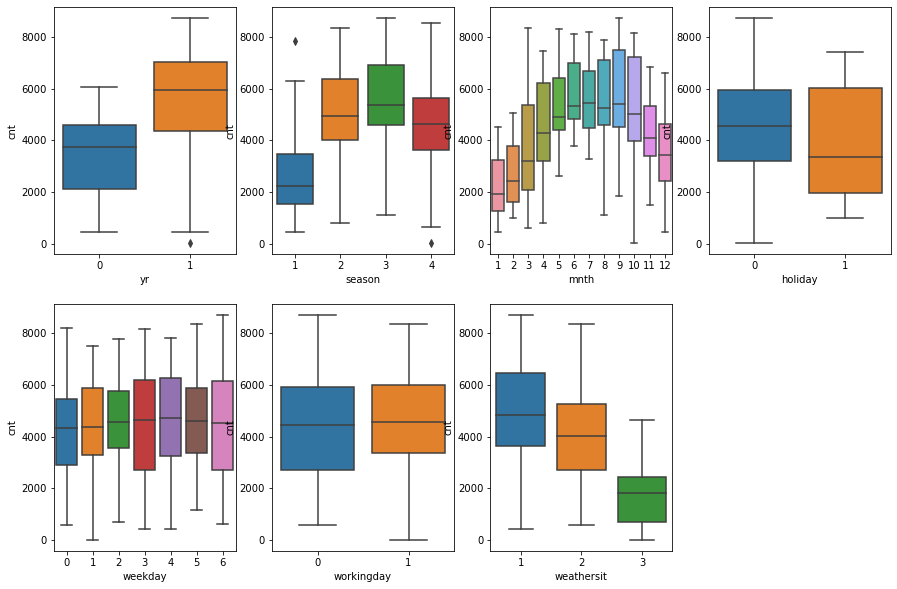

In [7]:
# visualise the categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(2,4,2)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=df)

## Observations

* Yr – 2019 recorded more rentals compared to 2018
* season – Fall had highest booking and spring the least
* mnth – September month recorded highest bookings and december the least
* holiday – rental booking was less on a holiday
* weekday – Not major difference in rental volume observed through out the week
* workingday – the median of rental booking is same on workingday and non-working day
* weathersit – People preferred Clear, Few clouds, Partly cloudy, Partly cloudy weather for riding bikes and avoided during Heavy rain or thunderstorm or snow 

<AxesSubplot:>

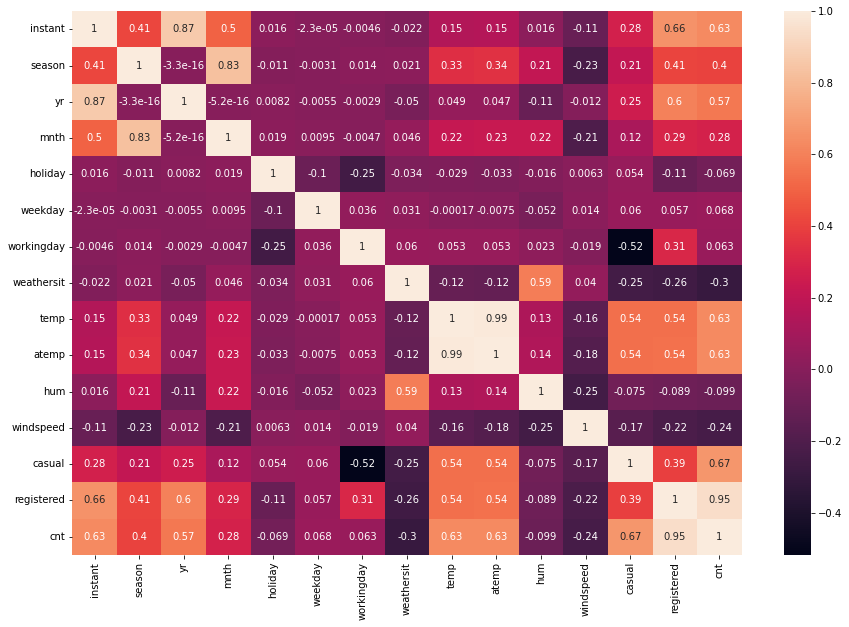

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

### Dropping irrelevant columns
***

In [9]:
#Drop columns related to dteday, casual and registered
df= df.drop('dteday', axis=1)
df= df.drop('casual', axis=1)
df= df.drop('registered', axis=1)
df= df.drop('instant', axis=1)


In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Preparing data for Modelling
***

In [11]:
# Creating dummy variables for season
season = pd.get_dummies(df['season'], drop_first=True, prefix='season')
#concat dummy season columns
df = pd.concat([df, season], axis=1)
# drop the season column
df= df.drop('season', axis=1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [12]:
# Creating dummy variables for Months
month = pd.get_dummies(df['mnth'], drop_first=True, prefix='month')
#concat dummy month columns
df = pd.concat([df, month], axis=1)
#drop month column
df= df.drop('mnth', axis=1)
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Creating dummy variables for weathersit
weather = pd.get_dummies(df['weathersit'], drop_first=True, prefix='weather')
#concat dummy weather columns
df = pd.concat([df, weather], axis=1)
#drop weather column
df= df.drop('weathersit', axis=1)
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_2,weather_3
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Creating dummy variables for weekday
weekday = pd.get_dummies(df['weekday'], drop_first=True, prefix='weekday')
#concat dummy weekday columns
df = pd.concat([df, weekday], axis=1)
#drop weather column
df= df.drop('weekday', axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_11,month_12,weather_2,weather_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
# Creating dummy variables for yr
yr = pd.get_dummies(df['yr'], drop_first=True, prefix='yr')
#concat dummy weekday columns
df = pd.concat([df, yr], axis=1)
#drop weather column
df= df.drop('yr', axis=1)
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,month_12,weather_2,weather_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr_1
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Splitting dataset in to train and test
***

In [16]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


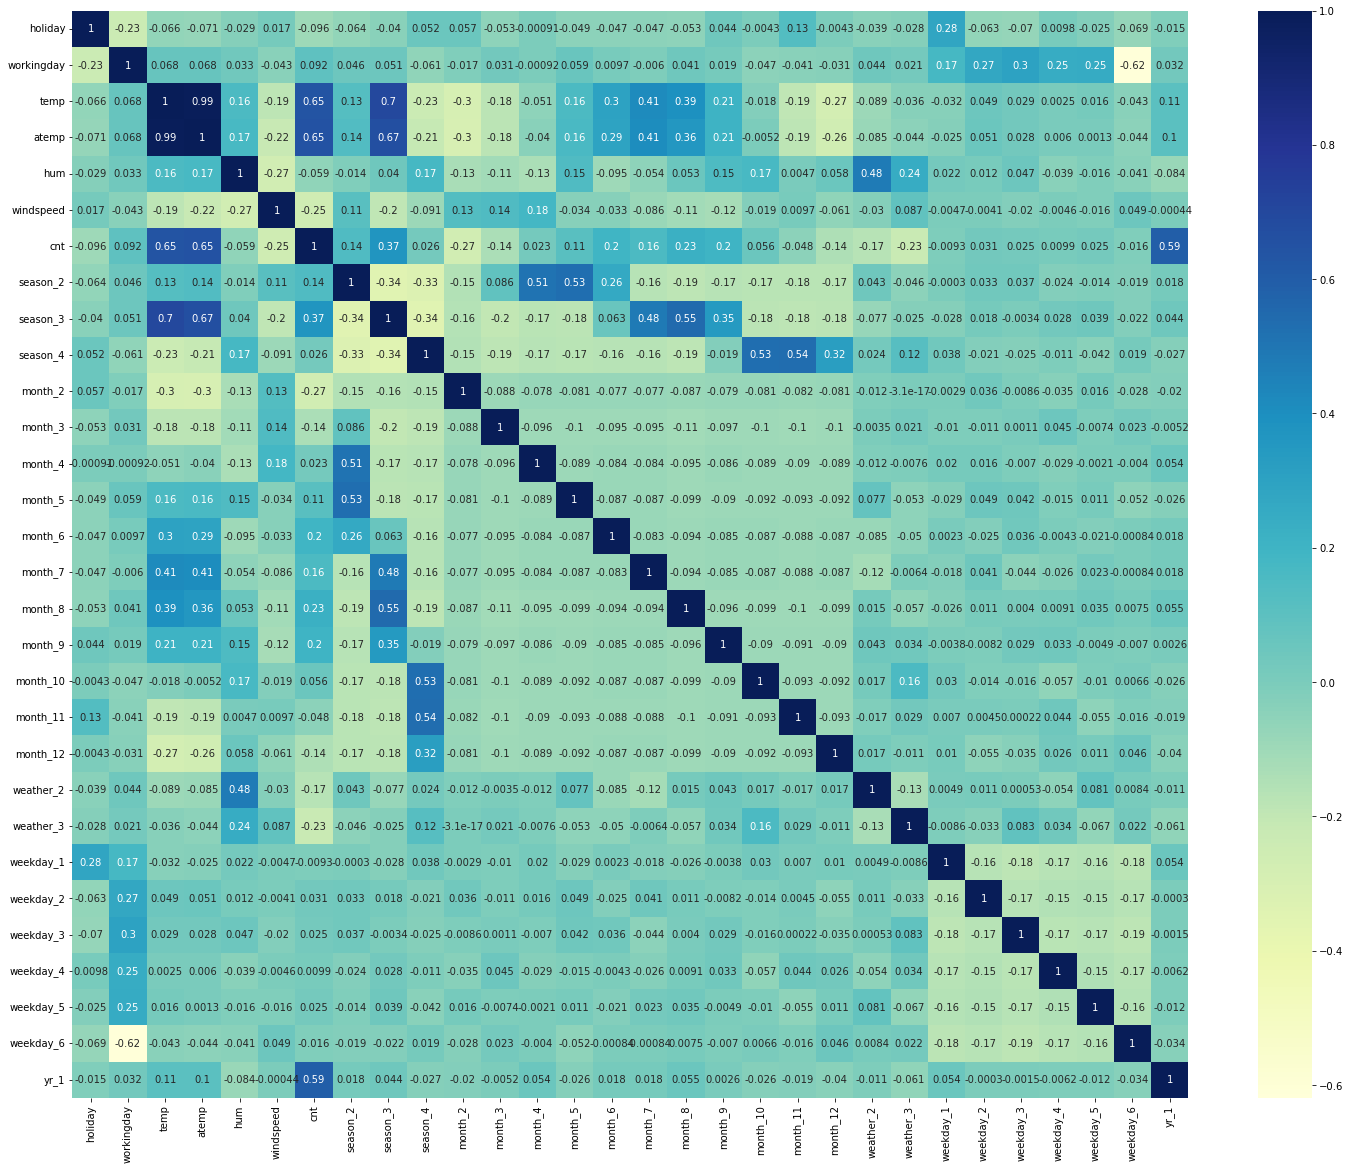

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     510 non-null    int64  
 1   workingday  510 non-null    int64  
 2   temp        510 non-null    float64
 3   atemp       510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    int64  
 7   season_2    510 non-null    uint8  
 8   season_3    510 non-null    uint8  
 9   season_4    510 non-null    uint8  
 10  month_2     510 non-null    uint8  
 11  month_3     510 non-null    uint8  
 12  month_4     510 non-null    uint8  
 13  month_5     510 non-null    uint8  
 14  month_6     510 non-null    uint8  
 15  month_7     510 non-null    uint8  
 16  month_8     510 non-null    uint8  
 17  month_9     510 non-null    uint8  
 18  month_10    510 non-null    uint8  
 19  month_11    510 non-null   

### Rescaling the features
***

In [19]:
# Minmax scaling for columns like temp, humid, windspeed and count
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,month_12,weather_2,weather_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr_1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,0,0,1,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,1,0,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,0,0,1,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,1,0,0,0,0,0,1,0,0


## Dividing into X and Y sets for model building

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building model using statsmodel
***

### Feature selection using RFE method

In [21]:
#Running RFE with the output number of variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=10)
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', False, 2),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('month_2', False, 3),
 ('month_3', False, 3),
 ('month_4', False, 3),
 ('month_5', False, 2),
 ('month_6', False, 2),
 ('month_7', False, 3),
 ('month_8', False, 2),
 ('month_9', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 3),
 ('month_12', False, 3),
 ('weather_2', False, 3),
 ('weather_3', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('yr_1', True, 1)]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_4',
       'month_9', 'weather_3', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'yr_1'],
      dtype='object')

In [24]:
X_train_rfe =X_train[col]

In [25]:
X_train_rfe

,holiday,workingday,temp,hum,windspeed,season_4,month_9,weather_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,yr_1
576,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,1,0,1
53,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,1,0,0,0
350,0,0,0.248216,0.577930,0.431816,1,0,0,0,0,0,0,0,0
79,0,1,0.462664,0.759870,0.529881,0,0,0,1,0,0,0,0,0


## Model 1

#### Analysis of VIF Computation 
***
Now, let us analyse whether the varibles have VIF > 5 

In [26]:
#Ignore the run time warning of divide by 0
warnings.simplefilter(action='ignore', category=RuntimeWarning)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,holiday,inf
1,workingday,inf
8,weekday_1,inf
9,weekday_2,inf
10,weekday_3,inf
11,weekday_4,inf
12,weekday_5,inf
3,hum,10.78
2,temp,7.14
4,windspeed,3.53


In [27]:
#Adding constant variable for the stats model
X_train_rfe = sm.add_constant(X_train_rfe)

### Model 1 Summary

In [28]:
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.42e-167
Time:                        13:54:54   Log-Likelihood:                 458.15
No. Observations:                 510   AIC:                            -888.3
Df Residuals:                     496   BIC:                            -829.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.892      0.0

**Notes** :
* Decided to drop weekday_3 as it has high p-value and VIF
* Though hum and temp has high VIF, let us hold on them as they have low p-value and is useful for bike sharing industry

### Model 2

In [29]:
# drop weekday_3
X_train_rfe2 = X_train_rfe.drop(['weekday_3'], axis=1)

In [30]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i ) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,42.45
2,workingday,2.14
9,weekday_1,1.76
10,weekday_2,1.60
11,weekday_4,1.60
12,weekday_5,1.59
1,holiday,1.34
4,hum,1.25
3,temp,1.20
5,windspeed,1.15


In [31]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train, X_train_rfe2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.42e-167
Time:                        13:54:55   Log-Likelihood:                 458.15
No. Observations:                 510   AIC:                            -888.3
Df Residuals:                     496   BIC:                            -829.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.892      0.0

**Notes** :
* Decided to drop weekday_5 as it has high p-value 

### Model 3

In [32]:
# drop weekday_3
X_train_rfe3 = X_train_rfe2.drop(['weekday_5'], axis=1)

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i ) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,42.44
2,workingday,1.51
9,weekday_1,1.39
11,weekday_4,1.28
10,weekday_2,1.27
1,holiday,1.25
4,hum,1.25
3,temp,1.20
5,windspeed,1.15
6,season_4,1.13


In [34]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)
lm = sm.OLS(y_train, X_train_rfe3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.09e-168
Time:                        13:54:55   Log-Likelihood:                 458.12
No. Observations:                 510   AIC:                            -890.2
Df Residuals:                     497   BIC:                            -835.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.029      8.898      0.0

**Notes** :
* Decided to drop weekday_4 as it has high p-value 

### Model 4

In [35]:
# drop weekday_4
X_train_rfe4 = X_train_rfe3.drop(['weekday_4'], axis=1)

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i ) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,42.38
2,workingday,1.27
4,hum,1.24
9,weekday_1,1.24
1,holiday,1.21
3,temp,1.20
5,windspeed,1.15
10,weekday_2,1.15
6,season_4,1.13
8,weather_3,1.11


In [37]:
X_train_rfe3 = sm.add_constant(X_train_rfe4)
lm = sm.OLS(y_train, X_train_rfe4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.20e-170
Time:                        13:54:55   Log-Likelihood:                 458.06
No. Observations:                 510   AIC:                            -892.1
Df Residuals:                     498   BIC:                            -841.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2559      0.029      8.899      0.0

**Notes** :
* Decided to drop weekday_2 as it has high p-value 

### Model 5

In [38]:
# drop weekday_2
X_train_rfe5 = X_train_rfe4.drop(['weekday_2'], axis=1)

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i ) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,42.33
4,hum,1.24
1,holiday,1.20
3,temp,1.20
9,weekday_1,1.17
5,windspeed,1.15
2,workingday,1.14
6,season_4,1.13
8,weather_3,1.11
7,month_9,1.07


In [40]:
X_train_rfe5 = sm.add_constant(X_train_rfe5)
lm = sm.OLS(y_train, X_train_rfe5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.17e-171
Time:                        13:54:55   Log-Likelihood:                 457.79
No. Observations:                 510   AIC:                            -893.6
Df Residuals:                     499   BIC:                            -847.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2566      0.029      8.934      0.0

**Notes** :
* Decided to drop weekday_1 as it has high p-value 

### Model 6

In [41]:
# drop weekday_2
X_train_rfe6 = X_train_rfe5.drop(['weekday_1'], axis=1)

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i ) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,42.29
4,hum,1.24
3,temp,1.20
5,windspeed,1.15
6,season_4,1.13
8,weather_3,1.11
1,holiday,1.07
2,workingday,1.07
7,month_9,1.07
9,yr_1,1.03


In [43]:
X_train_rfe6 = sm.add_constant(X_train_rfe6)
lm = sm.OLS(y_train, X_train_rfe6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     231.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.60e-172
Time:                        13:54:55   Log-Likelihood:                 457.58
No. Observations:                 510   AIC:                            -895.2
Df Residuals:                     500   BIC:                            -852.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2571      0.029      8.961      0.0

**Notes** :
* Decided to drop workingday as it has high p-value 

### Model 7

In [44]:
# drop workingday
X_train_rfe7 = X_train_rfe6.drop(['workingday'], axis=1)

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i ) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,40.19
3,hum,1.24
2,temp,1.19
4,windspeed,1.15
5,season_4,1.13
7,weather_3,1.10
6,month_9,1.07
8,yr_1,1.02
1,holiday,1.01


In [46]:
X_train_rfe7 = sm.add_constant(X_train_rfe7)
lm = sm.OLS(y_train, X_train_rfe7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.38e-172
Time:                        13:54:55   Log-Likelihood:                 456.14
No. Observations:                 510   AIC:                            -894.3
Df Residuals:                     501   BIC:                            -856.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2679      0.028      9.560      0.0

**Observations** :
* The Model 7 looks good wrt p-values being 0s
* The VIF values also look decent and hence very low multicollinearity between predictor variables
* R-squared and Adj-RSquared looks good at `0.805` and `0.802`
* F-statistic is high at `259` which suggests it is a good fit of the model

## Residual Analysis of the train data
***

In [47]:
y_train_pred = lm.predict(X_train_rfe7)

<AxesSubplot:ylabel='Density'>

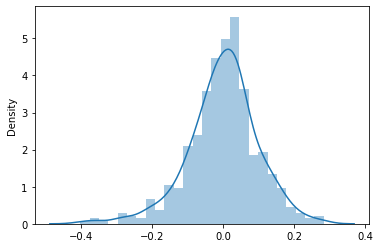

In [48]:
#Ignore the future warning related to distplot
warnings.simplefilter(action='ignore', category=FutureWarning)
res = y_train - y_train_pred
sns.distplot(res)

### Observations
1. The residuals are centred around 0, hence suggesting Linear Regression is valid

## Predictions and Evaluation on test set 
***

In [49]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,month_12,weather_2,weather_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr_1
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,1,0,1,0,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,0,1,0,0,0,1
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,0,0,1,0,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,month_12,weather_2,weather_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr_1
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.086364,0.318182,0.027273,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.481818
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.281541,0.466833,0.163248,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.500809
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
y_test = df_test.pop('cnt')
X_test = df_test

In [52]:
# Consider only the columns of the final data that was used to create final model
test_col = ['holiday', 'temp', 'hum', 'windspeed', 'season_4', 'month_9',
       'weather_3', 'yr_1']
X_test_rfe = X_test[test_col]
X_test_rfe

,holiday,temp,hum,windspeed,season_4,month_9,weather_3,yr_1
184,1,0.831783,0.657364,0.084219,0,0,0,0
535,0,0.901354,0.610133,0.153728,0,0,0,1
299,0,0.511964,0.837699,0.334206,1,0,0,0
221,0,0.881625,0.437098,0.339570,0,0,0,0
152,0,0.817246,0.314298,0.537414,0,0,0,0
...,...,...,...,...,...,...,...,...
702,0,0.519232,0.756118,0.283397,1,0,0,1
127,0,0.584649,0.650923,0.069510,0,0,0,0
640,0,0.745598,0.817947,0.052115,1,0,0,1
72,0,0.331557,0.512107,0.203418,0,0,0,0


In [53]:
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.head()

,const,holiday,temp,hum,windspeed,season_4,month_9,weather_3,yr_1
184,1.0,1,0.831783,0.657364,0.084219,0,0,0,0
535,1.0,0,0.901354,0.610133,0.153728,0,0,0,1
299,1.0,0,0.511964,0.837699,0.334206,1,0,0,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,0,0,0,0


In [54]:
y_test_pred = lm.predict(X_test_rfe)

### Residual Analysis of test data

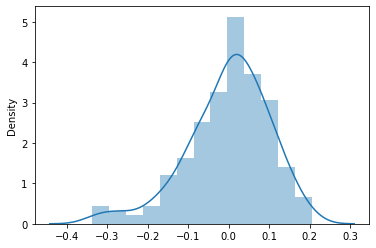

In [55]:
res_test = y_test - y_test_pred
sns.distplot(res_test)
#Ignore the future warning related to distplot
warnings.simplefilter(action='ignore', category=FutureWarning)

### Observations
1. The residuals are centred around 0, hence suggesting Linear Regression is valid

### q-q plot to ascertain Normal distribution of residuals

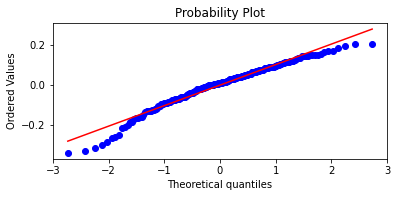

In [56]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(res_test, plot=ax, fit=True)

### Observation
*  Plot show a fairly straight line. Hence data comes from a normal distribution.

### Verifying Homoscedasticity Assumption

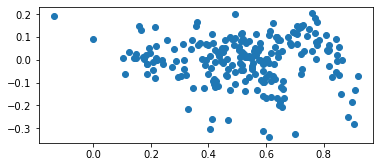

In [57]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_test_pred, res_test)

### Observation
* There is no observable pattern in this plot, hence there are no signs of non-linearity in the data. 
* There is no funnel shape is evident in the plot, hence reflect signs of constant variance i.e. homoscedasticity.

## Model Evaluation
***

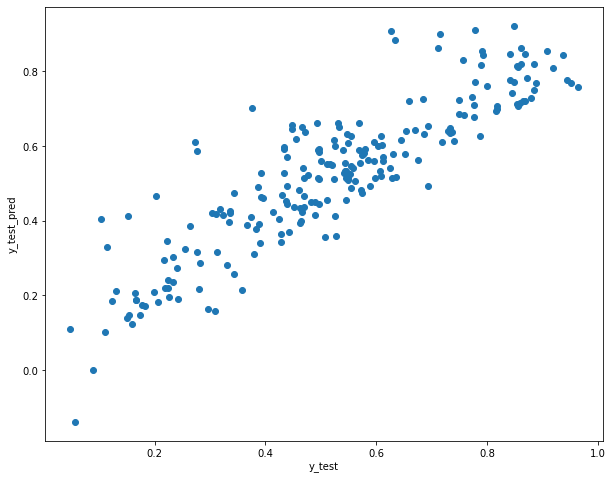

In [58]:
#Plot a scatter plot with Y-pred and Y-test
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### Observations
* The plot shows a linear relationship between actual and predicted values

## R2 Score computation
***

In [59]:
r2 =r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7797986387484099

### Observation 
1. The R2 square computed above (**0.779**) is very close to the earlier computes value of **0.805**

## Adjusted-RSquare computation
***

In [60]:
# Fetch number of rows in X_test
n = X_test.shape[0]

# Fetch number of predictors
p = X_test.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7461889572942199

# Final Model

***

### Model equation

*cnt = 0.267 + 0.609 X temp + 0.115 X season_4 + 0.077 X month_9 + 0.227 X yr_1 - 0.099 X holiday - 0.254 X hum - 0.179 X windspeed - 0.202 X weather_3*

**Predictor Variables**
* temp : temperature
* yr_1 : year - 2019
* season_4 : Season - Winter
* month_9 : Month - September
* holiday
* hum - Humidity
* Windspeed
* weather_3 - weather - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

**Inference:**
* Temperature, Season, month and year have postive impact on cnt whereas holiday, humidity, windspeed had negative impact on cnt

### Final observations of the model -
* The RSquare for training set turned out to be `0.805`
* The R Square computation with test set is `0.779` which is very close to the `0.80` observed during the training set
* The residual are centred around 0, which is ideal
* All the linear regression Assumptions are validated

**Overall, a pretty decent model to predict cnt variable for Bike Sharing**
